In [24]:
import networkx as nx
import pickle
from karateclub import Graph2Vec
import matplotlib.pyplot as plt

In [3]:
with open('graphs_dict.pkl', 'rb') as f:
    loaded_graphs = pickle.load(f)

In [ ]:
G = nx.Graph()

In [11]:
graph_list = []
for key in loaded_graphs.keys():
    graph_list.append(loaded_graphs[key]["graph"])

In [22]:
def reindex_graphs(graph_list):
    return [nx.convert_node_labels_to_integers(graph) for graph in graph_list]

# Reindex the graphs
graph_list_reindexed = reindex_graphs(graph_list)

# Initialize the Graph2Vec model
model = Graph2Vec(dimensions=2, wl_iterations=2)

# Fit the model with the reindexed graphs
model.fit(graph_list_reindexed)

# Get the embeddings
embeddings = model.get_embedding()

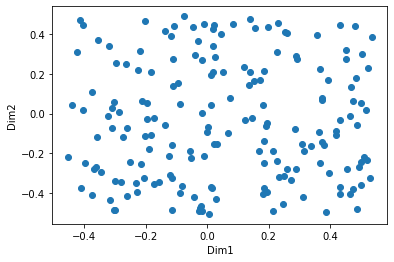

In [26]:
plt.scatter(embeddings[:, 0], embeddings[:, 1])
plt.xlabel("Dim1")
plt.ylabel("Dim2")
plt.show()

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
A = embeddings.T[0]
B = embeddings.T[1]


In [21]:
A

array([ 1.33988801e-02,  9.69361980e-03,  5.35006495e-03,  1.19255213e-02,
        1.21456906e-02,  5.44543192e-03,  1.09504387e-02, -8.48239637e-04,
        1.19731501e-02,  1.02894765e-03,  1.38128288e-02,  1.54871261e-02,
       -1.37023907e-02, -3.59323900e-03,  8.75958987e-03, -1.15864994e-02,
        1.56366043e-02,  1.48017490e-02,  8.59757978e-03, -1.18070552e-02,
        5.94473816e-03,  8.03361088e-03,  3.16511607e-03,  1.33387903e-02,
        4.75189136e-03, -8.84315744e-03,  1.96099607e-03,  7.02813920e-03,
       -3.95671045e-03,  4.20600967e-03, -1.31917652e-02, -1.20461285e-02,
       -2.89010629e-03, -1.19188707e-02,  6.59023412e-03,  6.45868154e-03,
        6.60578208e-03, -5.78313228e-03,  1.30343707e-02,  1.06717562e-02,
        6.26570545e-05, -1.72849803e-03, -7.42765609e-03,  1.51765784e-02,
       -2.15796940e-03, -1.02707352e-02,  4.59741708e-03, -4.22430038e-03,
       -9.10744071e-03, -1.36889694e-02, -9.99255478e-03,  1.62925553e-02,
        2.15209578e-03,  

In [1]:
import numpy as np

In [2]:
np.convolve((1,2,3), (4,5,6))

array([ 4, 13, 28, 27, 18])

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
adj_list = np.array([(1,2), (1,3), (2,3), (3,4), (4,5), (4,6), (6,7)])
G = nx.from_edgelist(adj_list)

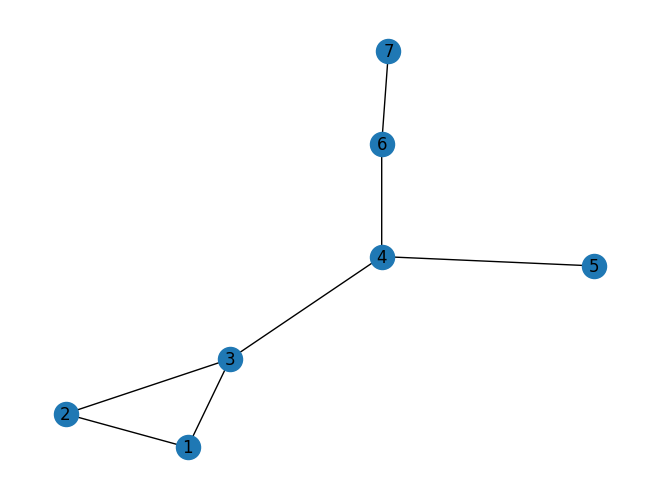

In [16]:
nx.draw(G, with_labels=True)

In [19]:
A = nx.adjacency_matrix(G)

In [36]:
A.toarray()

array([[0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

In [63]:
I = np.identity(A.shape[0])

In [64]:
A_TILDE = A + I

In [65]:
A_TILDE

array([[1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.]])

In [69]:
DEGREES = A_TILDE.sum(axis=1)

In [72]:
D_TILDE = np.diag(DEGREES)

In [73]:
D_TILDE

array([[3., 0., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0., 0.],
       [0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0., 2.]])

In [75]:
from numpy.linalg import inv

In [89]:
D_TILDE_INV = inv(D_TILDE)

In [ ]:
D_TILDE_INV